test1.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.76199767756664705, 0.0)
test2.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.74781335454502318, 0.0)
test3.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.72028028623932339, 0.0)
test4.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.17330807423529637, 0.0)
test.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.75068466561840519, 0.0)


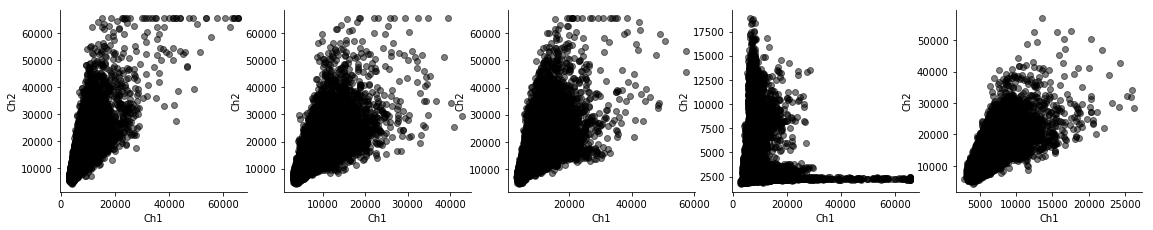

In [1]:
import os
import tifffile
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

# specify directory of images
indir = ('/Users/joshtitlow/tmp/coloc/')
infiles = os.listdir(indir)

# setup a figure and start counting
fig = plt.figure(figsize = (200,200))
n = 1

# Convert .ome.tiff to .tiff 
for file in infiles: 
    if file.endswith('.tif'):
        if not file.startswith('._'):
            # read image file and show data structure
            im = tifffile.imread(os.path.join(indir, file))
            print file, ', format =', im.shape

            # load channels into a flattened array
            ch1 = im[0].flatten()
            ch2 = im[1].flatten()

            # Perform pearson correlation analysis (returns coefficient and p-value)
            pearson = stats.pearsonr(ch1, ch2)
            print 'Pearson coef, pvalue:', pearson

            # plot the data
            #ax = plt.subplot(111)
            ax = fig.add_subplot(50,50,n)
            ax.scatter(ch1,ch2, c='black', alpha=0.5)

            ax.set_xlabel('Ch1', fontsize=10)
            ax.set_ylabel('Ch2', fontsize=10)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
            # iterate
            n+=1

# show the data
plt.show(fig)
